In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# 1. Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [3]:
# 2. Build CNN model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
# 3. Train model
model = build_cnn()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

/Users/deepak/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-21 14:54:22.885366: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-21 14:54:22.885515: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-21 14:54:22.886155: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-21 14:54:22.886840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-21 14:54:22.887175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Epoch 1/10


2025-10-21 14:54:25.248044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.4039 - loss: 1.6299 - val_accuracy: 0.4389 - val_loss: 1.5462
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5300 - loss: 1.3153 - val_accuracy: 0.5429 - val_loss: 1.2962
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5894 - loss: 1.1721 - val_accuracy: 0.6100 - val_loss: 1.1127
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6292 - loss: 1.0677 - val_accuracy: 0.6250 - val_loss: 1.0735
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6507 - loss: 1.0058 - val_accuracy: 0.6477 - val_loss: 1.0186
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6621 - loss: 0.9733 - val_accuracy: 0.6240 - val_loss: 1.0890
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6711 - loss: 0.9560 - val_accuracy: 0.6549 - val_loss: 1.0310
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6788 - loss: 0.9402 - val_accurac

In [5]:
# 4. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")



Test Accuracy: 0.5985


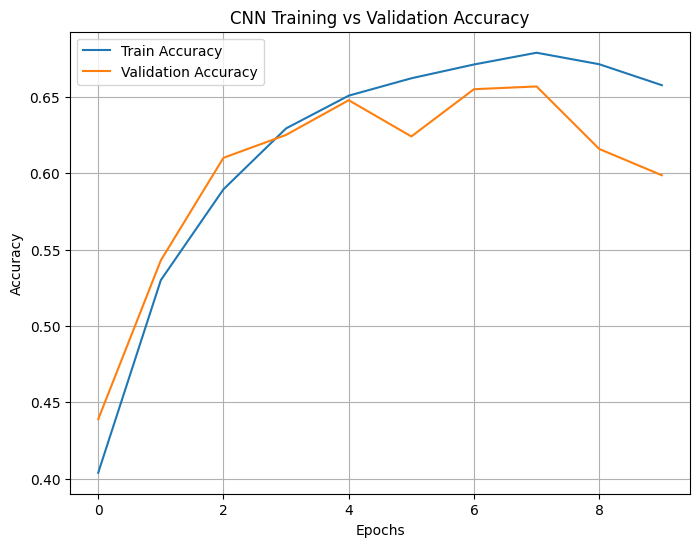

In [6]:
# 5. Plot training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

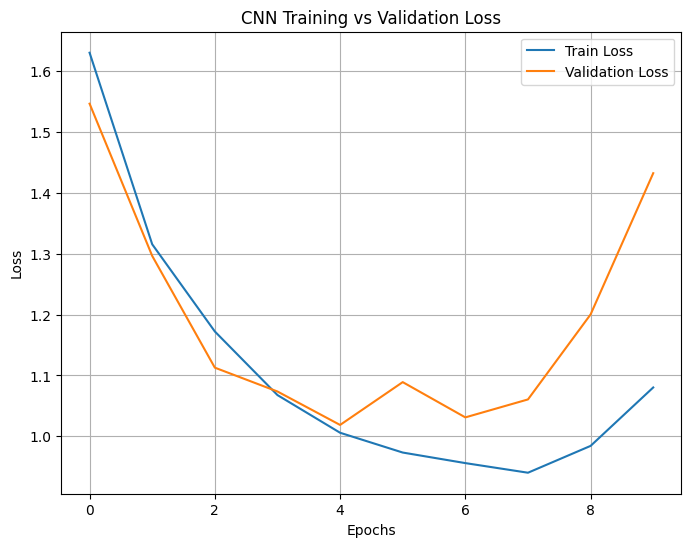

In [7]:
# 6. Plot training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


/var/folders/5l/855qnv753_s3y_thlxns95lr0000gn/T/ipykernel_21467/1190904025.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[int(y_test[i])]}")


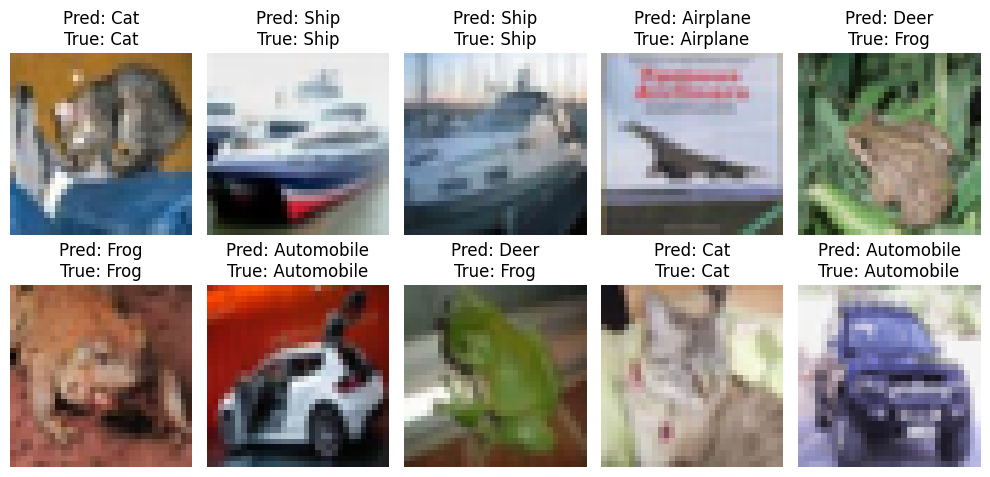

In [8]:
# 7. Display sample predictions
import numpy as np
preds = model.predict(x_test[:10])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[int(y_test[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 8. Generate predictions for the entire test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Flatten true labels
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


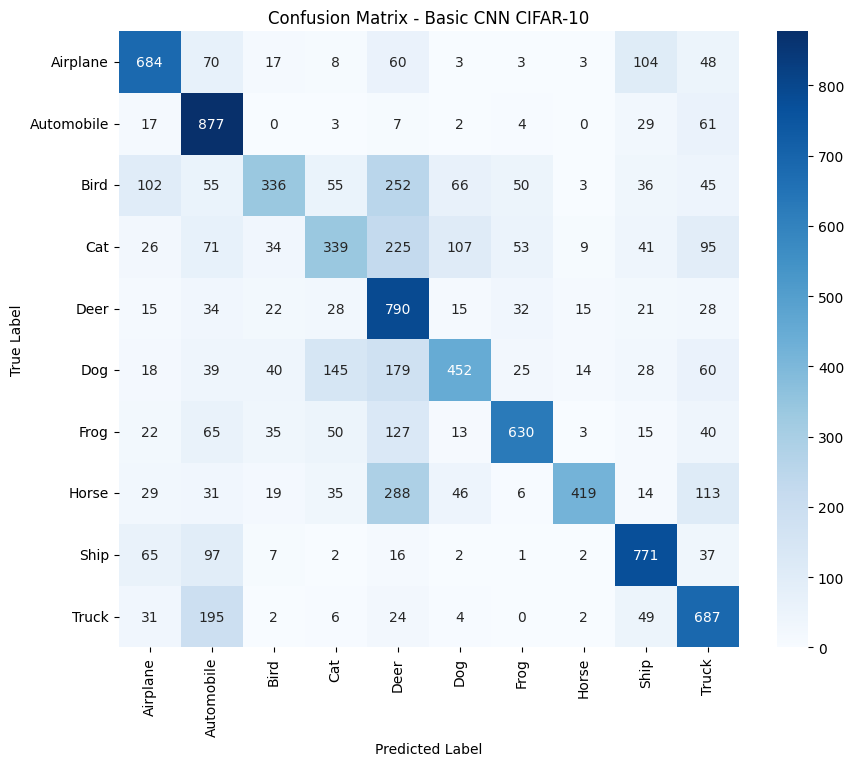

In [10]:
# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Basic CNN CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
# 10. Classification Report
print("\nClassification Report - Basic CNN CIFAR-10")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report - Basic CNN CIFAR-10
              precision    recall  f1-score   support

    Airplane       0.68      0.68      0.68      1000
  Automobile       0.57      0.88      0.69      1000
        Bird       0.66      0.34      0.44      1000
         Cat       0.51      0.34      0.41      1000
        Deer       0.40      0.79      0.53      1000
         Dog       0.64      0.45      0.53      1000
        Frog       0.78      0.63      0.70      1000
       Horse       0.89      0.42      0.57      1000
        Ship       0.70      0.77      0.73      1000
       Truck       0.57      0.69      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.64      0.60      0.59     10000
weighted avg       0.64      0.60      0.59     10000

